In [2]:
# import libraries
import os
import re
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
pd.set_option("display.max.columns", None)
pd.set_option("display.max.rows", None)
# set working directory
working_directory = "C:/Users/ADMIN/Documents/2022 kdhs"
os.chdir(working_directory)
# set random seed
random_seed = 5
max_nan_percent = 0.3
# upload pickled data
IR = pickle.load(open('data/data_preprocessed/IR_features.pkl', 'rb'))
MR = pickle.load(open('data/data_preprocessed/MR_features.pkl', 'rb'))
print(IR.shape)
print(MR.shape)

(16901, 264)
(14453, 186)


In [3]:
MR.head()

,Current age,Type of place of residence,Years lived in place of residence,Highest educational level,Total number of years of education,Usual resident or visitor,Number of household members (total listed),Number of eligible men in household (de facto),Sex of household head,Age of household head,Literacy,Frequency of reading newspaper or magazine,Frequency of listening to radio,Frequency of watching television,Owns a mobile telephone,Last 12 months use mobile telephone for financi,Is respondent's mobile phone a smart phone,Has an account in a bank or other financial ins,Use of internet,Frequency of using internet last month,Self reported health status,Wealth index combined,Wealth index factor score combined,Wealth index for urban/rural,Wealth index factor score for urban/rural,Sons at home,Daughters at home,Sons elsewhere,Daughters elsewhere,Sons who have died,Daughters who have died,Number of women fathered children with,Knowledge of any contraceptive method,Current contraceptive method,Current contraceptive by method type,Heard family planning on radio last few months,Heard family planning on TV last few months,Heard family planning in newspaper/magazine last few months,Heard family planning by text messages on mobil,"Seen about family planning on facebook, twitter","Seen about family planning on poster, brochure","Seen about family planning on outdoor sign, bil",Heard family planning at community meetings eve,Heard FP from friends/peers last 12 months,Heard FP on internet last 12 months,Discussed Family Planning with health worker in last few months,"Contraception is woman's business, man should not worry",Women who use contraception become promiscuous,Frequency currently smokes tobacco,Frequency currently uses smokeless tobacco,Frequency in the past smoked tobacco,Is respondent traditionally circumcised,Is respondent medically circumcised,Currently/formerly/never in union,Cohabitation duration (grouped),Age at first sex (imputed),Recent sexual activity,Fertility preference,Ideal number of children,Ideal number of boys,Ideal number of girls,Ideal number of either sex,Wife justified refusing sex: husband has other women,Currently working,Respondent worked in last 7 days,Employment all year/seasonal,Type of earnings from respondent's work,Owns a house alone or jointly,Owns land alone or jointly,Ever heard of a Sexually Transmitted Infection (STI),Ever heard of AIDS,Condom used during last sex with most recent partner,Had any STI in last 12 months,Had genital sore/ulcer in last 12 months,Had genital discharge in last 12 months,"Number of sex partners, including spouse, in last 12 months",Relationship with most recent sex partner,Ever been tested for HIV,Heard about other STIs,Wife justified asking husband to use condom if he has STI,Drugs to avoid HIV transmission to baby during pregnancy,Would buy vegetables from vendor with HIV,Total lifetime number of sex partners,Hypertension_status,Ever been told that you have high blood sugar,Ever been told by a doctor or other healthcare,Ever been told have lung disease,Ever been told have cancer,Ever been told by have depression,Ever been told have anxiety,Ever been told have arthritis,Respondent's education,How much paid in last month,Religion_catholicism,Religion_protestantism,Religion_evangelical churches,Religion_african instituted churches,Religion_other christian,Religion_islam,Religion_hindu,Religion_traditionists,Religion_no religion/atheists,Religion_other,Ethnicity_embu,Ethnicity_kalenjin,Ethnicity_kamba,Ethnicity_kikuyu,Ethnicity_kisii,Ethnicity_luhya,Ethnicity_luo,Ethnicity_maasai,Ethnicity_meru,Ethnicity_mijikenda/swahili,Ethnicity_somali,Ethnicity_taita/taveta,Ethnicity_other,Relationship to household head_head,Relationship to household head_husband/wife,Relationship to household head_son/daughter,Relationship to household head_children-in-law,Relationship to household head_parent-in-law,Relationship to household head_brother/sister,Relationship to household head_co-spouse,

In [4]:
# IR = IR.dropna(axis = 0, how ='any')  
# MR = MR.dropna(axis = 0, how ='any')  

In [5]:
print(IR.shape)
print(MR.shape)

(16901, 264)
(14453, 186)


In [6]:
list(IR.columns)

['Current age',
 'Type of place of residence',
 'Cluster altitude in meters',
 'Years lived in place of residence',
 'Highest educational level',
 'Time to get to water source',
 'Household has: electricity',
 'Household has: radio',
 'Household has: television',
 'Household has: refrigerator',
 'Household has: bicycle',
 'Household has: motorcycle/scooter',
 'Household has: car/truck',
 'Total number of years of education',
 'Usual resident or visitor',
 'Number of household members (total listed)',
 'Number of children 5 and under in household (de jure)',
 'Number of eligible women in household (de facto)',
 'Sex of household head',
 'Age of household head',
 'Household has: telephone (land-line)',
 'Literacy',
 'Frequency of reading newspaper or magazine',
 'Frequency of listening to radio',
 'Frequency of watching television',
 'Toilet facilities shared with other households',
 'Owns a mobile telephone',
 'Last 12 months use mobile telephone for financi',
 "Is respondent's mobile p

In [7]:
# IR.columns = IR.columns.str.lstrip('County_') 
# MR.columns = MR.columns.str.lstrip('County_') 

In [8]:
# # remove variables with very low variance (treshold ?!?)clean_data_F
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(IR)
len(IR.columns[constant_filter.get_support()])
constant_columns = [column for column in IR.columns if column not in IR.columns[constant_filter.get_support()]]
print(constant_columns)
IR.drop(labels=constant_columns, axis=1, inplace=True)

['Births in month of interview', 'Snuffs by nose', 'Smokes kreteks', 'Smokes cigars, cheroots or cigarillos', 'Smokes water pipe', 'Snuff by mouth', 'Chews betel quid with tobacco', 'Mother had any insects', 'Mother had any other food', 'Ever heard of a Sexually Transmitted Infection (STI)', 'Ever heard of AIDS', 'Told they have high blood sugar', 'Told they have heart disease', 'Diagnosed with TB in last 12 months', 'Told they had breast cancer', 'Told they have cervical cancer', 'Religion_hindu', 'Religion_other christian', 'Religion_traditionists', 'Relationship to household head_adopted/foster/step child', 'Relationship to household head_parent', 'Relationship to household head_parent-in-law', 'Knowledge of ovulatory cycle_other']


In [9]:
# # remove variables with very low variance (treshold ?!?)clean_data_F
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(MR)
len(MR.columns[constant_filter.get_support()])
constant_columns = [column for column in MR.columns if column not in MR.columns[constant_filter.get_support()]]
print(constant_columns)
MR.drop(labels=constant_columns, axis=1, inplace=True)

['Is respondent traditionally circumcised', 'Is respondent medically circumcised', 'Ever heard of a Sexually Transmitted Infection (STI)', 'Ever heard of AIDS', 'Ever been told that you have high blood sugar', 'Ever been told by a doctor or other healthcare', 'Ever been told have lung disease', 'Ever been told have cancer', 'Religion_other christian', 'Religion_hindu', 'Religion_traditionists', 'Relationship to household head_children-in-law', 'Relationship to household head_parent-in-law', 'Knowledge of ovulatory cycle_other', 'Occupation_clerical']


# # correlation matrix
IR.drop(columns='Hypertension_status', inplace=True)
IR_correlated_features = set()
IR_correlation_matrix = IR.corr()
    
# # remove columns for correlation above 0.8
for i in range(len(IR_correlation_matrix.columns)):
    for j in range(i):
        if abs(IR_correlation_matrix.iloc[i, j]) > 0.8:
            colname = IR_correlation_matrix.columns[i]
            IR_correlated_features.add(colname)
len(IR_correlated_features)
# IR.drop(labels=IR_correlated_features, axis=1, inplace=True)

IR_correlated_features

# # correlation matrix
MR.drop(columns='Hypertension_status', inplace=True)
MR_correlated_features = set()
MR_correlation_matrix = MR.corr()
    
# # remove columns for correlation above 0.8
for i in range(len(MR_correlation_matrix.columns)):
    for j in range(i):
        if abs(MR_correlation_matrix.iloc[i, j]) > 0.8:
            colname = MR_correlation_matrix.columns[i]
            MR_correlated_features.add(colname)
len(MR_correlated_features)
# MR.drop(labels=MR_correlated_features, axis=1, inplace=True)

MR_correlated_features

In [10]:
IR.drop(['Births in last three years',
 'Cohabitation duration (grouped)',
 'Contraceptive use and intention',
 'Entries in immunization roster',
 'Entries in pregnancy and postnatal care roster',
 'Ideal number of girls',
 'Number of sex partners, including spouse, in last 12 months',
 'Occupation_not working',
 'Pattern of contraceptive use',
 'Relationship with most recent sex partner',
 'Respondent worked in last 7 days',
 "Respondent's education",
 'Total number of years of education',
 'Wealth index factor score combined',
 'Wealth index factor score for urban/rural'],axis=1, inplace=True)

MR.drop(['Cohabitation duration (grouped)',
 'Condom used during last sex with most recent partner',
 'Fertility preference',
 'Frequency of using internet last month',
 'Occupation_not working',
 'Relationship with most recent sex partner',
 'Respondent worked in last 7 days',
 "Respondent's education",
 'Total number of years of education',
 'Wealth index factor score combined',
 'Wealth index factor score for urban/rural'],axis=1, inplace=True)

In [11]:
# percentage of missing data per category
pd.set_option("display.max.rows", None)
total = IR.isnull().sum().sort_values(ascending=False)
percent_total = (IR.isnull().sum()/IR.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
Number of minutes per week exercises,4485,26.536891
Is respondent's mobile phone a smart phone,4251,25.152358
HIV_positivity,3212,19.004793
Age at first sex (imputed),3157,18.679368
Total lifetime number of sex partners,2902,17.170582
Time since last sex (in days),2799,16.561150
Condom used during last sex with most recent partner,2798,16.555233
Toilet facilities shared with other households,2252,13.324655
Used emergency contraception in past 12 months,1040,6.153482
Thinks all people with TB have HIV,736,4.354772


In [12]:
print(IR.shape)
print(MR.shape)

(16901, 226)
(14453, 160)


In [13]:
MR.Hypertension_status.value_counts()

Hypertension_status
0.0    13974
1.0      479
Name: count, dtype: int64

In [14]:
list(IR.columns)

['Current age',
 'Type of place of residence',
 'Cluster altitude in meters',
 'Years lived in place of residence',
 'Highest educational level',
 'Time to get to water source',
 'Household has: electricity',
 'Household has: radio',
 'Household has: television',
 'Household has: refrigerator',
 'Household has: bicycle',
 'Household has: motorcycle/scooter',
 'Household has: car/truck',
 'Usual resident or visitor',
 'Number of household members (total listed)',
 'Number of children 5 and under in household (de jure)',
 'Number of eligible women in household (de facto)',
 'Sex of household head',
 'Age of household head',
 'Household has: telephone (land-line)',
 'Literacy',
 'Frequency of reading newspaper or magazine',
 'Frequency of listening to radio',
 'Frequency of watching television',
 'Toilet facilities shared with other households',
 'Owns a mobile telephone',
 'Last 12 months use mobile telephone for financi',
 "Is respondent's mobile phone a smart phone",
 'Self reported he

In [15]:
list(MR.columns)

['Current age',
 'Type of place of residence',
 'Years lived in place of residence',
 'Highest educational level',
 'Usual resident or visitor',
 'Number of household members (total listed)',
 'Number of eligible men in household (de facto)',
 'Sex of household head',
 'Age of household head',
 'Literacy',
 'Frequency of reading newspaper or magazine',
 'Frequency of listening to radio',
 'Frequency of watching television',
 'Owns a mobile telephone',
 'Last 12 months use mobile telephone for financi',
 "Is respondent's mobile phone a smart phone",
 'Has an account in a bank or other financial ins',
 'Use of internet',
 'Self reported health status',
 'Wealth index combined',
 'Wealth index for urban/rural',
 'Sons at home',
 'Daughters at home',
 'Sons elsewhere',
 'Daughters elsewhere',
 'Sons who have died',
 'Daughters who have died',
 'Number of women fathered children with',
 'Knowledge of any contraceptive method',
 'Current contraceptive method',
 'Current contraceptive by meth

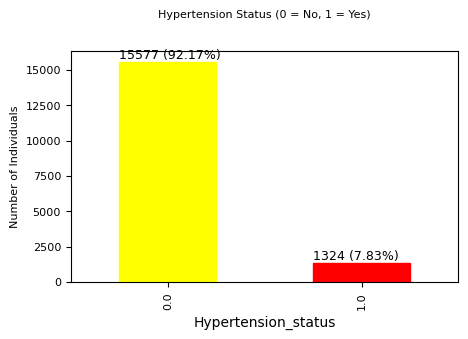

In [16]:
ax = IR['Hypertension_status'].value_counts().plot(kind='bar', figsize=(5, 3), fontsize=8)
ax.set_title('Hypertension Status (0 = No, 1 = Yes)', size=8, pad=24)
ax.set_ylabel('Number of Individuals', fontsize=8)

N = len(IR)
colors= ['yellow','red']
idx = 0
for i in ax.patches:
    ax.text(i.get_x(), i.get_height() + 240, f"{str(round(i.get_height(), 2))} ({round(i.get_height()*100/N, 2)}%)", fontsize=9)
    i.set_color(colors[idx])
    idx+=1

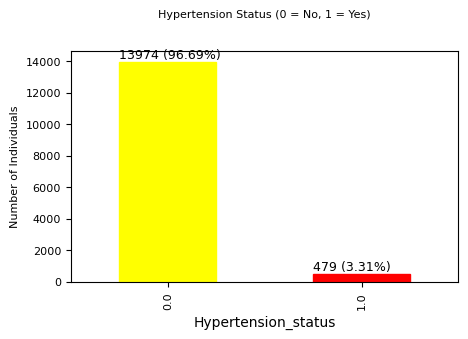

In [17]:
ax = MR['Hypertension_status'].value_counts().plot(kind='bar', figsize=(5, 3), fontsize=8)
ax.set_title('Hypertension Status (0 = No, 1 = Yes)', size=8, pad=24)
ax.set_ylabel('Number of Individuals', fontsize=8)

N = len(MR)
colors= ['yellow','red']
idx = 0
for i in ax.patches:
    ax.text(i.get_x(), i.get_height() + 240, f"{str(round(i.get_height(), 2))} ({round(i.get_height()*100/N, 2)}%)", fontsize=9)
    i.set_color(colors[idx])
    idx+=1

## Importing resample from *sklearn.utils* package.
from sklearn.utils import resample 
# Separate the case of yes-subscribes and no-subscribes
IR_Hypertension_status_no = IR[IR.Hypertension_status == 0] 
IR_Hypertension_status_yes = IR[IR.Hypertension_status == 1] 
##Upsample the yes-Hypertension cases.
IR_minority_upsampled = resample(IR_Hypertension_status_yes, replace=True, # sample with replacement
                                 n_samples=2334) 
# Combine majority class with upsampled minority class
new_IR = pd.concat([IR_Hypertension_status_no, IR_minority_upsampled]) 

from sklearn.utils import shuffle 
IR = shuffle(new_IR)
IR.Hypertension_status.value_counts()

# Dealing with imbalanced datasets

## Importing resample from *sklearn.utils* package.
from sklearn.utils import resample 
# Separate the case of yes-subscribes and no-subscribes
MR_Hypertension_status_no = MR[MR.Hypertension_status == 0] 
MR_Hypertension_status_yes = MR[MR.Hypertension_status == 1] 
##Upsample the yes-Hypertension cases.
MR_minority_upsampled = resample(MR_Hypertension_status_yes, replace=True, # sample with replacement
                                 n_samples=2000) 
# Combine majority class with upsampled minority class
new_MR = pd.concat([MR_Hypertension_status_no, MR_minority_upsampled]) 

from sklearn.utils import shuffle 
MR = shuffle(new_MR)
MR.Hypertension_status.value_counts()

In [18]:
County_list = ['Baringo',
 'Bomet',
 'Bungoma',
 'Busia',
 'Elgeyo-marakwet',
 'Embu',
 'Garissa',
 'Homa bay',
 'Isiolo',
 'Kajiado',
 'Kakamega',
 'Kericho',
 'Kiambu',
 'Kilifi',
 'Kirinyaga',
 'Kisii',
 'Kisumu',
 'Kitui',
 'Kwale',
 'Laikipia',
 'Lamu',
 'Machakos',
 'Makueni',
 'Mandera',
 'Marsabit',
 'Meru',
 'Migori',
 'Mombasa',
 "Murang'a",
 'Nairobi',
 'Nakuru',
 'Nandi',
 'Narok',
 'Nyamira',
 'Nyandarua',
 'Nyeri',
 'Samburu',
 'Siaya',
 'Taita taveta',
 'Tana river',
 'Tharaka nithi',
 'Trans nzoia',
 'Turkana',
 'Uasin gishu',
 'Vihiga',
 'Wajir',
 'West pokot']

In [19]:
list(MR.columns)

['Current age',
 'Type of place of residence',
 'Years lived in place of residence',
 'Highest educational level',
 'Usual resident or visitor',
 'Number of household members (total listed)',
 'Number of eligible men in household (de facto)',
 'Sex of household head',
 'Age of household head',
 'Literacy',
 'Frequency of reading newspaper or magazine',
 'Frequency of listening to radio',
 'Frequency of watching television',
 'Owns a mobile telephone',
 'Last 12 months use mobile telephone for financi',
 "Is respondent's mobile phone a smart phone",
 'Has an account in a bank or other financial ins',
 'Use of internet',
 'Self reported health status',
 'Wealth index combined',
 'Wealth index for urban/rural',
 'Sons at home',
 'Daughters at home',
 'Sons elsewhere',
 'Daughters elsewhere',
 'Sons who have died',
 'Daughters who have died',
 'Number of women fathered children with',
 'Knowledge of any contraceptive method',
 'Current contraceptive method',
 'Current contraceptive by meth

In [20]:
list(IR.columns)

['Current age',
 'Type of place of residence',
 'Cluster altitude in meters',
 'Years lived in place of residence',
 'Highest educational level',
 'Time to get to water source',
 'Household has: electricity',
 'Household has: radio',
 'Household has: television',
 'Household has: refrigerator',
 'Household has: bicycle',
 'Household has: motorcycle/scooter',
 'Household has: car/truck',
 'Usual resident or visitor',
 'Number of household members (total listed)',
 'Number of children 5 and under in household (de jure)',
 'Number of eligible women in household (de facto)',
 'Sex of household head',
 'Age of household head',
 'Household has: telephone (land-line)',
 'Literacy',
 'Frequency of reading newspaper or magazine',
 'Frequency of listening to radio',
 'Frequency of watching television',
 'Toilet facilities shared with other households',
 'Owns a mobile telephone',
 'Last 12 months use mobile telephone for financi',
 "Is respondent's mobile phone a smart phone",
 'Self reported he

In [21]:
IR.to_csv('unimputed_data_women.csv',index = False)
MR.to_csv('unimputed_data_men.csv',index = False)

 # Dealing with imbalanced datasets
# Synthetic Minority Oversampling Technique (SMOTE)

# Dealing with imbalanced datasets

## Importing resample from *sklearn.utils* package.
from sklearn.utils import resample 
# Separate the case of yes-subscribes and no-subscribes
MR_Hypertension_status_no = MR[MR.Hypertension_status == 0] 
MR_Hypertension_status_yes = MR[MR.Hypertension_status == 1] 
##Upsample the yes-Hypertension cases.
MR_minority_upsampled = resample(MR_Hypertension_status_yes, replace=True, # sample with replacement
                                 n_samples=6987) 
# Combine majority class with upsampled minority class
new_MR = pd.concat([MR_Hypertension_status_no, MR_minority_upsampled]) 

from sklearn.utils import shuffle 
MR = shuffle(new_MR)
MR.Hypertension_status.value_counts()

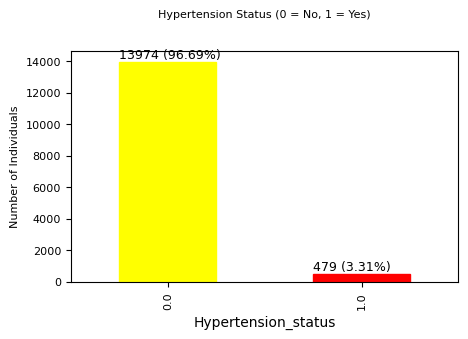

In [22]:
ax = MR['Hypertension_status'].value_counts().plot(kind='bar', figsize=(5, 3), fontsize=8)
ax.set_title('Hypertension Status (0 = No, 1 = Yes)', size=8, pad=24)
ax.set_ylabel('Number of Individuals', fontsize=8)

N = len(MR)
colors= ['yellow','red']
idx = 0
for i in ax.patches:
    ax.text(i.get_x(), i.get_height() + 240, f"{str(round(i.get_height(), 2))} ({round(i.get_height()*100/N, 2)}%)", fontsize=9)
    i.set_color(colors[idx])
    idx+=1

In [23]:
# extraction of column names
IR_col_names = IR.columns.drop('Hypertension_status')
MR_col_names =MR.columns.drop('Hypertension_status')

# Dealing with imbalanced datasets

## Importing resample from *sklearn.utils* package.
from sklearn.utils import resample 
# Separate the case of yes-subscribes and no-subscribes
IR_Hypertension_status_no = IR[IR.Hypertension_status == 0] 
IR_Hypertension_status_yes = IR[IR.Hypertension_status == 1] 
##Upsample the yes-Hypertension cases.
IR_minority_upsampled = resample(IR_Hypertension_status_yes, replace=True, # sample with replacement
                                 n_samples=7788) 
# Combine majority class with upsampled minority class
new_IR = pd.concat([IR_Hypertension_status_no, IR_minority_upsampled]) 

from sklearn.utils import shuffle 
IR = shuffle(new_IR)
IR.Hypertension_status.value_counts()

MR_Y = MR['Hypertension_status'].astype('float')
IR_Y = IR['Hypertension_status'].astype('float')

MR_X = MR.drop(columns='Hypertension_status').astype('float')
IR_X = IR.drop(columns='Hypertension_status').astype('float')

 # Dealing with imbalanced datasets
# Synthetic Minority Oversampling Technique (SMOTE)
# https://arxiv.org/pdf/1106.1813
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=random_seed)
IR_county_dummy, IR_Y = sm.fit_resample(IR_X, IR_Y)

MR_county_dummy,  MR_Y = sm.fit_resample(MR_X, MR_Y)
# MR_county_dummy.Hypertension_status.value_counts()

In [24]:
IR_county_dummy = IR
MR_county_dummy = MR
#===============================================================================================================================
CMR_train = {}
CMR_test = {}
CIR_train = {}
CIR_test = {}
CMR_Y_train = {}
CMR_Y_test = {}
CIR_Y_train = {}
CIR_Y_test = {}

for name in list(County_list):
    CMR_train[name] = MR_county_dummy[MR_county_dummy[name]!=1].astype('float')
    CMR_test[name] = MR_county_dummy[MR_county_dummy[name]==1].astype('float')
    CMR_Y_train[name] = MR_county_dummy['Hypertension_status'][MR_county_dummy[name]!=1].astype('float')
    CMR_Y_test[name] = MR_county_dummy['Hypertension_status'][MR_county_dummy[name]==1].astype('float')
    CMR_train[name].drop(columns='Hypertension_status', inplace=True)
    CMR_test[name].drop(columns='Hypertension_status', inplace=True)
   
    CIR_train[name] = IR_county_dummy[IR_county_dummy[name]!=1].astype('float')
    CIR_test[name] = IR_county_dummy[IR_county_dummy[name]==1].astype('float')
    CIR_Y_train[name] = IR_county_dummy['Hypertension_status'][IR_county_dummy[name]!=1].astype('float')
    CIR_Y_test[name] = IR_county_dummy['Hypertension_status'][IR_county_dummy[name]==1].astype('float')
    CIR_train[name].drop(columns='Hypertension_status', inplace=True)
    CIR_test[name].drop(columns='Hypertension_status', inplace=True)

   
#================================================================================================================================

#================================================================================================================================
# remove county flag - impute - standardize
#================================================================================================================================

MR_X_train = {}
MR_X_test = {}
MR_Y_train = {}
MR_Y_test = {}
IR_X_train = {}
IR_X_test = {}
IR_Y_train = {}
IR_Y_test = {}

# split between train (80%) and test (20%) with stratification
for name in list(County_list):  
    MR_X_train[name], MR_X_test[name], MR_Y_train[name], MR_Y_test[name] = train_test_split(CMR_train[name], CMR_Y_train[name], test_size=0.2, stratify=CMR_Y_train[name], random_state=random_seed)
    IR_X_train[name], IR_X_test[name], IR_Y_train[name], IR_Y_test[name] = train_test_split(CIR_train[name], CIR_Y_train[name], test_size=0.2, stratify=CIR_Y_train[name], random_state=random_seed)


# multiple imputations using chained equations
n_imputations = 5
MR_X_train_comp = {}
MR_X_test_comp = {}
CMR_test_comp = {}

MR_X_train_imp = {}
MR_X_test_imp = {}
CMR_test_imp = {}

for name in list(County_list):
    MR_X_train_comp[name] = []
    MR_X_test_comp[name] = []
    CMR_test_comp[name] = []
    
    for i in range(n_imputations):
        print(f'Current imputed county is {name}')
        print(f'Current imputation round is {i+1}/{n_imputations}')
        MR_imputer = IterativeImputer(sample_posterior=True, random_state=i, verbose=1)
        MR_X_train_comp[name].append(MR_imputer.fit_transform(MR_X_train[name]))
        MR_X_test_comp[name].append(MR_imputer.transform(MR_X_test[name]))
        CMR_test_comp[name].append(MR_imputer.transform(CMR_test[name]))
        
        MR_X_train_imp[name] = pd.DataFrame(np.mean(MR_X_train_comp[name], axis=0), columns=MR_col_names)
        MR_X_test_imp[name] = pd.DataFrame(np.mean(MR_X_test_comp[name], axis=0), columns=MR_col_names)
        CMR_test_imp[name] = pd.DataFrame(np.mean(CMR_test_comp[name], axis=0), columns=MR_col_names)
    
# imputation processing
def min_max_int(df, column, nb_cat=float('inf')):
    df[column] = round(df[column], 0)
    df[column][df[column] < 0] = 0
    df[column][df[column] > nb_cat - 1] = nb_cat - 1
    return df

def onehot(df, name):
    onehot = pd.DataFrame()
    for colonne in list(df.columns):
        if re.match(name, colonne):
            for indice in df[colonne][~df[colonne].isin([0, 1])].index:
                onehot.loc[indice, colonne] = df.loc[indice, colonne]
    i = 0
    for indice in onehot.index:
        onehot.loc[indice, list(onehot.idxmax(axis=1))[i]] = 1
        i += 1
    onehot[onehot!=1] = 0
    df.update(onehot)
    return df

MR_X_train_proc =  {}
MR_X_test_proc =  {}
CMR_test_proc =  {}

def MR_imp_process(df):
    min_max_int(df,"Current age")
    min_max_int(df, 'Type of place of residence',2)
    min_max_int(df, 'Years lived in place of residence')
    min_max_int(df, 'Highest educational level', 3)
    min_max_int(df, 'Usual resident or visitor', 2)
    min_max_int(df, 'Number of household members (total listed)')
    min_max_int(df, 'Number of eligible men in household (de facto)')
    min_max_int(df, 'Sex of household head',2)
    min_max_int(df, 'Age of household head',2)
    min_max_int(df, 'Literacy',3)
    min_max_int(df, 'Frequency of reading newspaper or magazine',3)
    min_max_int(df, 'Frequency of listening to radio',3)
    min_max_int(df, 'Frequency of watching television',3)
    min_max_int(df, 'Owns a mobile telephone',2)
    min_max_int(df, 'Last 12 months use mobile telephone for financi',3)
    min_max_int(df, "Is respondent's mobile phone a smart phone",3)
    min_max_int(df, "Has an account in a bank or other financial ins",2) 
    min_max_int(df, "Use of internet",3)
    min_max_int(df, "Self reported health status",5)
    min_max_int(df, "Wealth index combined",5)
    min_max_int(df, "Wealth index for urban/rural",5)
    min_max_int(df, "Sons at home")
    min_max_int(df, "Daughters at home")
    min_max_int(df, "Sons elsewhere")
    min_max_int(df, "Daughters elsewhere")
    min_max_int(df, "Sons who have died")
    min_max_int(df, "Daughters who have died")
    min_max_int(df, "Number of women fathered children with")
    min_max_int(df, "Knowledge of any contraceptive method",3)
    min_max_int(df, "Current contraceptive method",2)
    min_max_int(df, "Current contraceptive by method type",4)
    min_max_int(df, "Heard family planning on radio last few months",2)
    min_max_int(df, "Heard family planning on TV last few months",2)
    min_max_int(df, "Heard family planning in newspaper/magazine last few months",2)
    min_max_int(df, "Heard family planning by text messages on mobil",2)
    min_max_int(df, "Seen about family planning on facebook, twitter",2)
    min_max_int(df, "Seen about family planning on poster, brochure",2)
    min_max_int(df, "Seen about family planning on outdoor sign, bil",2)
    min_max_int(df, "Heard family planning at community meetings eve",2)
    min_max_int(df, "Heard FP from friends/peers last 12 months",2)
    min_max_int(df, "Heard FP on internet last 12 months",2)
    min_max_int(df, "Discussed Family Planning with health worker in last few months",2)
    min_max_int(df, "Contraception is woman's business, man should not worry",2)
    # min_max_int(df, "Women who use contraception become promiscuousy",2)
    min_max_int(df, "Frequency currently smokes tobacco",2)
    min_max_int(df, "Frequency currently uses smokeless tobacco",2)
    min_max_int(df, "Frequency in the past smoked tobacco",3)
    min_max_int(df, "Currently/formerly/never in union",3)
    min_max_int(df, "Age at first sex (imputed)")
    min_max_int(df, "Recent sexual activity",2)
    # min_max_int(df, "Fertility preference",4)
    min_max_int(df, "Ideal number of children")
    min_max_int(df, "Ideal number of boys")
    min_max_int(df, "Ideal number of girls")
    min_max_int(df, "Ideal number of either sex")
    min_max_int(df, "Wife justified refusing sex: husband has other women")
    min_max_int(df, "Currently working",2)
    min_max_int(df, "Employment all year/seasonal",3)
    min_max_int(df, "Type of earnings from respondent's work",2)
    min_max_int(df, "Owns a house alone or jointly",4)
    min_max_int(df, "Owns land alone or jointly",4)
    min_max_int(df, "Had any STI in last 12 months",2)
    min_max_int(df, "Had genital sore/ulcer in last 12 months",2)
    min_max_int(df, "Had genital discharge in last 12 months",2)
    min_max_int(df, "Number of sex partners, including spouse, in last 12 months",2)
    min_max_int(df, "Ever been tested for HIV",2)
    min_max_int(df, "Heard about other STIs",2)
    min_max_int(df, "Wife justified asking husband to use condom if he has STI",2)
    min_max_int(df, "Drugs to avoid HIV transmission to baby during pregnancy",2)
    min_max_int(df, "Would buy vegetables from vendor with HIV",2)
    min_max_int(df, "Total lifetime number of sex partners")
    min_max_int(df, "Ever been told by have depression",2)
    min_max_int(df, "Ever been told have anxiety",2)
    min_max_int(df, "Ever been told have arthritis",2)
    min_max_int(df, "How much paid in last month",2)
    min_max_int(df, "Religion_catholicism",2)
    min_max_int(df, 'Religion_protestantism',2)
    min_max_int(df, 'Religion_evangelical churches',2)
    min_max_int(df, 'Religion_african instituted churches',2)
    min_max_int(df, 'Religion_islam',2)
    min_max_int(df, 'Religion_no religion/atheists',2)
    min_max_int(df, 'Religion_other',2)
    min_max_int(df, 'Ethnicity_embu',2)
    min_max_int(df, 'Ethnicity_kalenjin',2)
    min_max_int(df, 'Ethnicity_kamba',2)
    min_max_int(df,  'Ethnicity_kikuyu',2)
    min_max_int(df,  'Ethnicity_kisii',2)
    min_max_int(df, 'Ethnicity_luhya',2)
    min_max_int(df, 'Ethnicity_luo',2)
    min_max_int(df,  'Ethnicity_maasai',2)
    min_max_int(df, 'Ethnicity_meru',2)
    min_max_int(df, 'Ethnicity_mijikenda/swahili',2)
    min_max_int(df, 'Ethnicity_somali',2)
    min_max_int(df, 'Ethnicity_taita/taveta',2)
    min_max_int(df, 'Ethnicity_other',2)
    min_max_int(df, 'Relationship to household head_head',2)
    min_max_int(df, 'Relationship to household head_husband/wife',2)
    min_max_int(df, 'Relationship to household head_son/daughter',2)
    min_max_int(df, 'Relationship to household head_brother/sister',2)
    min_max_int(df, 'Relationship to household head_co-spouse',2)
    min_max_int(df, 'Relationship to household head_other relative',2)
    min_max_int(df, 'Knowledge of ovulatory cycle_during her period',2)
    min_max_int(df, 'Knowledge of ovulatory cycle_after period ended',2)
    min_max_int(df, 'Knowledge of ovulatory cycle_middle of the cycle',2)
    min_max_int(df, 'Knowledge of ovulatory cycle_before period begins',2)
    min_max_int(df, 'Knowledge of ovulatory cycle_at any time',2)
    min_max_int(df,"Knowledge of ovulatory cycle_don't know",2)
    min_max_int(df, "Occupation_professional/technical/managerial",2)
    min_max_int(df, "Occupation_sales",2)
    min_max_int(df, "Occupation_agricultural",2)
    min_max_int(df,"Occupation_household and domestic", 2)
    min_max_int(df, 'Occupation_services',2)
    min_max_int(df, 'Occupation_manual',2)
    return df
for name in list(County_list):
    MR_X_train_proc[name] = MR_imp_process(MR_X_train_imp[name])
    MR_X_test_proc[name] = MR_imp_process(MR_X_test_imp[name])
    CMR_test_proc[name] = MR_imp_process(CMR_test_imp[name])

    
MR_X_train_ready = {}
MR_X_test_ready = {}
CMR_test_ready = {}

# standardization of the data
for name in list(County_list):
    MR_scaler = StandardScaler(with_mean=False)
    MR_X_train_ready[name] = round(pd.DataFrame(MR_scaler.fit_transform(MR_X_train_proc[name]), columns=MR_col_names), 2)
    MR_X_test_ready[name] = round(pd.DataFrame(MR_scaler.transform(MR_X_test_proc[name]), columns=MR_col_names), 2)
    CMR_test_ready[name] = round(pd.DataFrame(MR_scaler.transform(CMR_test_proc[name]), columns=MR_col_names), 2)
    MR_var = MR_scaler.var_
    
# pickling data
f = open("data/data_preprocessed/MR_X_train_imp.pkl", 'wb')
pickle.dump(MR_X_train_imp, f)
f = open("data/data_preprocessed/MR_X_test_imp.pkl", 'wb')
pickle.dump(MR_X_test_imp, f)
f = open("data/data_preprocessed/CMR_test_imp.pkl", 'wb')
pickle.dump(CMR_test_imp, f)

f = open("data/data_preprocessed/MR_X_train_comp.pkl", 'wb')
pickle.dump(MR_X_train_comp, f)
f = open("data/data_preprocessed/MR_X_test_comp.pkl", 'wb')
pickle.dump(MR_X_test_comp, f)
f = open("data/data_preprocessed/CMR_test_comp.pkl", 'wb')
pickle.dump(CMR_test_comp, f)

f = open("data/data_preprocessed/MR_X_train_proc.pkl", 'wb')
pickle.dump(MR_X_train_proc, f)
f = open("data/data_preprocessed/MR_X_test_proc.pkl", 'wb')
pickle.dump(MR_X_test_proc, f)
f = open("data/data_preprocessed/CMR_test_proc.pkl", 'wb')
pickle.dump(CMR_test_proc, f)

f = open("data/data_preprocessed/MR_X_train_ready.pkl", 'wb')
pickle.dump(MR_X_train_ready, f)
f = open("data/data_preprocessed/MR_X_test_ready.pkl", 'wb')
pickle.dump(MR_X_test_ready, f)
f = open("data/data_preprocessed/CMR_test_ready.pkl", 'wb')
pickle.dump(CMR_test_ready, f)

f = open("data/data_preprocessed/MR_Y_train.pkl", 'wb')
pickle.dump(MR_Y_train, f)
f = open("data/data_preprocessed/MR_Y_test.pkl", 'wb')
pickle.dump(MR_Y_test, f)
f = open("data/data_preprocessed/CMR_Y_test.pkl", 'wb')
pickle.dump(CMR_Y_test, f)

f = open("data/data_preprocessed/MR_var.pkl", 'wb')
pickle.dump(MR_var, f)

f.close()

In [ ]:
# multiple imputations using chained equations
n_imputations = 5
IR_X_train_comp = {}
IR_X_test_comp = {}
CIR_test_comp = {}

IR_X_train_imp = {}
IR_X_test_imp = {}
CIR_test_imp = {}

for name in list(County_list):
    IR_X_train_comp[name] = []
    IR_X_test_comp[name] = []
    CIR_test_comp[name] = []
    
    for i in range(n_imputations):
        print(f'Current imputed county is {name}')
        print(f'Current imputation round is {i+1}/{n_imputations}')
        IR_imputer = IterativeImputer(sample_posterior=True, random_state=i, verbose=1)
        IR_X_train_comp[name].append(IR_imputer.fit_transform(IR_X_train[name]))
        IR_X_test_comp[name].append(IR_imputer.transform(IR_X_test[name]))
        CIR_test_comp[name].append(IR_imputer.transform(CIR_test[name]))
        
        IR_X_train_imp[name] = pd.DataFrame(np.mean(IR_X_train_comp[name], axis=0), columns=IR_col_names)
        IR_X_test_imp[name] = pd.DataFrame(np.mean(IR_X_test_comp[name], axis=0), columns=IR_col_names)
        CIR_test_imp[name] = pd.DataFrame(np.mean(CIR_test_comp[name], axis=0), columns=IR_col_names)
    
# imputation processing
def min_max_int(df, column, nb_cat=float('inf')):
    df[column] = round(df[column], 0)
    df[column][df[column] < 0] = 0
    df[column][df[column] > nb_cat - 1] = nb_cat - 1
    return df

def onehot(df, name):
    onehot = pd.DataFrame()
    for colonne in list(df.columns):
        if re.match(name, colonne):
            for indice in df[colonne][~df[colonne].isin([0, 1])].index:
                onehot.loc[indice, colonne] = df.loc[indice, colonne]
    i = 0
    for indice in onehot.index:
        onehot.loc[indice, list(onehot.idxmax(axis=1))[i]] = 1
        i += 1
    onehot[onehot!=1] = 0
    df.update(onehot)
    return df

IR_X_train_proc =  {}
IR_X_test_proc =  {}
CIR_test_proc =  {}

def IR_imp_process(df):
    min_max_int(df, 'Current age')
    onehot(df, 'Type of place of residence')
    min_max_int(df, 'Cluster altitude in meters')
    min_max_int(df, 'Years lived in place of residence')
    min_max_int(df, 'Highest educational level', 4)
    min_max_int(df, 'Time to get to water source')
    min_max_int(df,'Household has: electricity',2)
    min_max_int(df, 'Household has: radio',2)
    min_max_int(df, 'Household has: television', 2)
    min_max_int(df, 'Household has: refrigerator',2)
    min_max_int(df, 'Household has: bicycle',2)
    min_max_int(df, 'Household has: motorcycle/scooter',2)
    min_max_int(df, 'Household has: car/truck',2)
    min_max_int(df, 'Usual resident or visitor',2)
    min_max_int(df,'Number of household members (total listed)')
    min_max_int(df, 'Number of children 5 and under in household (de jure)')
    min_max_int(df,'Number of eligible women in household (de facto)')
    min_max_int(df,'Sex of household head',2)
    min_max_int(df,'Age of household head')
    min_max_int(df,'Household has: telephone (land-line)',2)
    min_max_int(df,'Literacy',3)
    min_max_int(df, 'Frequency of reading newspaper or magazine',3)
    min_max_int(df, 'Frequency of listening to radio',3)
    min_max_int(df, 'Frequency of watching television',3)
    min_max_int(df,'Toilet facilities shared with other households',2)
    min_max_int(df,'Owns a mobile telephone',2)
    min_max_int(df,'Last 12 months use mobile telephone for financi',2)
    min_max_int(df, "Is respondent's mobile phone a smart phone",2)
    min_max_int(df, 'Self reported health status',5)
    min_max_int(df,'Wealth index combined',5)
    min_max_int(df,'Wealth index for urban/rural',5)
    min_max_int(df,'Type of mosquito bed net(s) slept under last night',4)
    min_max_int(df,'Sons at home')
    min_max_int(df, 'Daughters at home')
    min_max_int(df, 'Sons elsewhere')
    min_max_int(df,'Daughters elsewhere')
    min_max_int(df,'Sons who have died')
    min_max_int(df, 'Daughters who have died')
    min_max_int(df,'Births in last five years')
    min_max_int(df,'Births in past year')
    min_max_int(df, 'Currently pregnant',2)
    min_max_int(df,  'Menstruated in last six weeks',2)
    min_max_int(df,  'Ever had a terminated pregnancy',2)
    min_max_int(df,  'Index last child prior to maternity-health (calendar)',6)
    min_max_int(df,  'Index last child prior to maternity-health (calendar)',6)
    min_max_int(df,  'Knowledge of any contraceptive method',6)
    min_max_int(df,'Ever used anything or tried to delay or avoid getting pregnant',3)
    min_max_int(df,'Current contraceptive method',2)
    onehot(df, 'Current contraceptive by method type')
    min_max_int(df,'Heard family planning on radio last few months',2)
    min_max_int(df,'Heard family planning on TV last few months',2)
    min_max_int(df,'Heard family planning in newspaper/magazine last few months',2)
    min_max_int(df,'Heard family planning by text messages on mobil',2)
    min_max_int(df,'Seen about family planning on facebook, twitter',2)
    min_max_int(df,'Seen about family planning on poster, brochure',2)
    min_max_int(df,'Seen about family planning on outdoor sign, bil',2)
    min_max_int(df,'Heard family planning at community meetings eve',2)
    min_max_int(df,'Heard FP from friends/peers last 12 months',2)
    min_max_int(df,'Heard FP on internet last 12 months',2)
    min_max_int(df,'Visited by fieldworker in last 12 months',2)
    min_max_int(df,'Visited health facility last 12 months',2)
    min_max_int(df,'Used emergency contraception in past 12 months',2)
    min_max_int(df,'Currently breastfeeding',2)
    min_max_int(df,'Currently amenorrheic',2)
    min_max_int(df, 'Currently abstaining',2)
    min_max_int(df, 'Does not use cigarettes and tobacco',2)
    min_max_int(df, 'Have mosquito bed net for sleeping',2)
    min_max_int(df, 'Getting medical help for self: getting permission to go',2)
    min_max_int(df, 'Getting medical help for self: getting money needed for treatment',2)
    min_max_int(df, 'Getting medical help for self: distance to health facility',2)
    min_max_int(df, 'Getting medical help for self: not wanting to go alone',2)
    min_max_int(df, 'Mother had any other liquid',2)
    min_max_int(df, 'Mother had sodas/malt/sports/energy drinks',2)
    min_max_int(df, 'Mother had fruit juice, fruit-flavored drinks',2)
    min_max_int(df, 'Mother had other vegetables',2)
    min_max_int(df, 'Mother had sausages, hot dogs, frankfurters',2)
    min_max_int(df, 'Mother had nuts, seeds',2)
    min_max_int(df, 'Mother had porridge, bread, rice, noodles',2)
    min_max_int(df, 'Mother had plantains, white potatoes, yams',2)
    min_max_int(df, 'Mother had eggs',2)
    min_max_int(df, 'Mother had any other meat (beef, pork, lamb)',2)
    min_max_int(df, 'Mother had pumpkin, carrots, squash, sweet pota',2)
    min_max_int(df,  'Mother had any dark green leafy vegetables',2)
    min_max_int(df, 'Mother had mangoes, papayas, other vitamin A',2)
    min_max_int(df, 'Mother had any other fruits',2)
    min_max_int(df, 'Mother had liver, heart, other organs',2)
    min_max_int(df,  'Mother had fish or shellfish',2)
    min_max_int(df, 'Mother had food made from beans, peas, lentils',2)
    min_max_int(df,  'Mother had cheese, yogurt, other milk products',2)
    min_max_int(df, 'Mother had sweet foods, chocolates, candies',2)
    min_max_int(df, 'Mother had chips, crisps, french fries, fried',2)
    min_max_int(df, 'Mother had CS foods',2)
    min_max_int(df,'Woman had sweetened tea, coffee or herbal drink',2)
    min_max_int(df,'Currently/formerly/never in union',3)
    min_max_int(df,'Time since last sex (in days)')
    min_max_int(df, 'Age at first sex (imputed)')
    min_max_int(df, 'Recent sexual activity',2)
    onehot(df,'Fertility preference')
    min_max_int(df, 'Ideal number of children')
    min_max_int(df,'Fecund (definition 3)',2)
    min_max_int(df,'Ideal number of boys')
    min_max_int(df,'Ideal number of either sex')
    min_max_int(df,'Wife justified refusing sex: husband has other women',2)
    min_max_int(df,'Currently working',2)
    onehot(df, 'Owns a house alone or jointly')
    onehot(df,'Owns land alone or jointly')
    min_max_int(df,'Condom used during last sex with most recent partner',2)
    min_max_int(df,'Had any STI in last 12 months',2)
    min_max_int(df,'Had genital sore/ulcer in last 12 months',2)
    min_max_int(df,'Had genital discharge in last 12 months',2)
    min_max_int(df,'Ever been tested for HIV',2)
    min_max_int(df,'Heard about other STIs',2)
    min_max_int(df,'Wife justified asking husband to use condom if he has STI',2)
    min_max_int(df,'Drugs to avoid HIV transmission to baby during pregnancy',2)
    min_max_int(df,'Would buy vegetables from vendor with HIV',2)
    min_max_int(df, 'Total lifetime number of sex partners')
    min_max_int(df,'HIV_positivity',2)
    min_max_int(df,'Told they have lung disease',2)
    min_max_int(df, 'Told they have depression',2)
    min_max_int(df,'Told they have anxiety',2)
    min_max_int(df,'Told they have arthritis',2)
    min_max_int(df,'Heard of TB',2)
    min_max_int(df, 'Thinks all people with TB have HIV',2)
    min_max_int(df,'Visited by community health worker in last 3 months',2)
    min_max_int(df,'Aware can examine breasts for cancer',2)
    min_max_int(df, 'Number of days per week exercises',2)
    min_max_int(df, 'Number of minutes per week exercises')
    min_max_int(df, 'Number of hours per day seated')
    min_max_int(df, 'Religion_african instituted churches',2)
    min_max_int(df,'Religion_catholicism',2)
    min_max_int(df,'Religion_evangelical churches',2)
    min_max_int(df,'Religion_islam',2)
    min_max_int(df,'Religion_no religion/atheists',2)
    min_max_int(df, 'Religion_other',2)
    min_max_int(df,'Religion_protestantism',2)
    min_max_int(df,'Relationship to household head_not related',2)
    min_max_int(df,'Relationship to household head_other relative',2)
    min_max_int(df,'Relationship to household head_son or daughter',2)
    min_max_int(df,'Relationship to household head_son-in-law or daughter-in-law',2)
    min_max_int(df,'Knowledge of ovulatory cycle_after period ended',2)
    min_max_int(df, 'Knowledge of ovulatory cycle_at any time',2)
    min_max_int(df,'Knowledge of ovulatory cycle_before period begins',2)
    min_max_int(df,"Knowledge of ovulatory cycle_don't know",2)
    min_max_int(df, 'Knowledge of ovulatory cycle_during her period',2)
    min_max_int(df,'Knowledge of ovulatory cycle_middle of the cycle',2)
    min_max_int(df, 'Unmet need for contraception_infecund, menopausal',2)
    min_max_int(df, 'Unmet need for contraception_never had sex',2)
    min_max_int(df,'Unmet need for contraception_no unmet need',2)
    min_max_int(df,'Unmet need for contraception_not married and no sex in last 30 days',2)
    min_max_int(df, 'Unmet need for contraception_unmet need for limiting',2)
    min_max_int(df, 'Unmet need for contraception_unmet need for spacing',2)
    min_max_int(df,'Unmet need for contraception_using for limiting',2)
    min_max_int(df,'Unmet need for contraception_using for spacing',2) 
    min_max_int(df,'Occupation_agricultural',2)
    min_max_int(df,'Occupation_clerical',2)
    min_max_int(df,'Occupation_household and domestic',2)
    min_max_int(df,'Occupation_manual',2)
    min_max_int(df,'Occupation_professional/technical/managerial',2)
    min_max_int(df,'Occupation_sales',2)
    min_max_int(df,'Occupation_services',2)
    min_max_int(df, 'Beating justified',2)
    min_max_int(df, "Presence of other people for 'Wife beating justified' questions",2)
    min_max_int(df,  'Presence of other people during the sexual activity section of the interview',2)
    min_max_int(df,  'Ethnicity_embu',2)
    min_max_int(df,  'Ethnicity_kalenjin',2)
    min_max_int(df, 'Ethnicity_kamba',2)
    min_max_int(df, 'Ethnicity_kikuyu',2)
    min_max_int(df, 'Ethnicity_kisii',2)
    min_max_int(df, 'Ethnicity_luhya',2)
    min_max_int(df, 'Ethnicity_luo',2)
    min_max_int(df, 'Ethnicity_maasai',2)
    min_max_int(df, 'Ethnicity_meru',2)
    min_max_int(df, 'Ethnicity_mijikenda/swahili',2)
    min_max_int(df, 'Ethnicity_other',2)
    min_max_int(df, 'Ethnicity_somali',2)
    min_max_int(df,  'Ethnicity_taita/taveta',2)
    return df

for name in list(County_list):
    IR_X_train_proc[name] = IR_imp_process(IR_X_train_imp[name])
    IR_X_test_proc[name] = IR_imp_process(IR_X_test_imp[name])
    CIR_test_proc[name] = IR_imp_process(CIR_test_imp[name])
    
IR_X_train_ready = {}
IR_X_test_ready = {}
CIR_test_ready = {}

# standardization of the data
for name in list(County_list):
    IR_scaler = StandardScaler(with_mean=False)
    IR_X_train_ready[name] = round(pd.DataFrame(IR_scaler.fit_transform(IR_X_train_proc[name]), columns=IR_col_names), 2)
    IR_X_test_ready[name] = round(pd.DataFrame(IR_scaler.transform(IR_X_test_proc[name]), columns=IR_col_names), 2)
    CIR_test_ready[name] = round(pd.DataFrame(IR_scaler.transform(CIR_test_proc[name]), columns=IR_col_names), 2)
    IR_var = IR_scaler.var_
    
# pickling data
f = open("data/data_preprocessed/IR_X_train_imp.pkl", 'wb')
pickle.dump(IR_X_train_imp, f)
f = open("data/data_preprocessed/IR_X_test_imp.pkl", 'wb')
pickle.dump(IR_X_test_imp, f)
f = open("data/data_preprocessed/CIR_test_imp.pkl", 'wb')
pickle.dump(CIR_test_imp, f)

f = open("data/data_preprocessed/IR_X_train_comp.pkl", 'wb')
pickle.dump(IR_X_train_comp, f)
f = open("data/data_preprocessed/IR_X_test_comp.pkl", 'wb')
pickle.dump(IR_X_test_comp, f)
f = open("data/data_preprocessed/CIR_test_comp.pkl", 'wb')
pickle.dump(CIR_test_comp, f)

f = open("data/data_preprocessed/IR_X_train_proc.pkl", 'wb')
pickle.dump(IR_X_train_proc, f)
f = open("data/data_preprocessed/IR_X_test_proc.pkl", 'wb')
pickle.dump(IR_X_test_proc, f)
f = open("data/data_preprocessed/CIR_test_proc.pkl", 'wb')
pickle.dump(CIR_test_proc, f)

f = open("data/data_preprocessed/IR_X_train_ready.pkl", 'wb')
pickle.dump(IR_X_train_ready, f)
f = open("data/data_preprocessed/IR_X_test_ready.pkl", 'wb')
pickle.dump(IR_X_test_ready, f)
f = open("data/data_preprocessed/CIR_test_ready.pkl", 'wb')
pickle.dump(CIR_test_ready, f)

f = open("data/data_preprocessed/IR_Y_train.pkl", 'wb')
pickle.dump(IR_Y_train, f)
f = open("data/data_preprocessed/IR_Y_test.pkl", 'wb')
pickle.dump(IR_Y_test, f)
f = open("data/data_preprocessed/CIR_Y_test.pkl", 'wb')
pickle.dump(CIR_Y_test, f)

f = open("data/data_preprocessed/IR_var.pkl", 'wb')
pickle.dump(IR_var, f)
f.close()

Current imputed county is Baringo
Current imputation round is 1/5
[IterativeImputer] Completing matrix with shape (13206, 225)
